<a href="https://colab.research.google.com/github/K-Viera/Python/blob/main/Python/IA/FuzzySets/IA_Fuzzy_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teoría de los conjuntos borrosos

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import skfuzzy.control as ctrl

## Conjuntos borrosos y variables linguísticas

Los conjuntos borrosos son caracterizados por funciones de pertenencia.

**Función triangular**: definida por un límite inferior *a*, un límite superior *b* y un *m* donde alcanza su máximo valor, donde *a <m <b*.

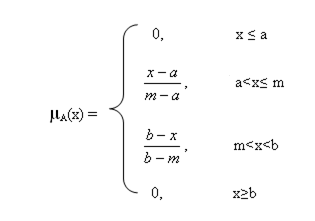

`trimf(x, amb)`

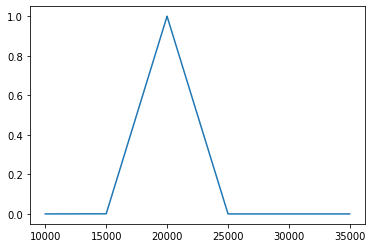

In [ ]:
## Se define el Universo en x
x = np.arange(10000, 35000, 0.1)
mf_t= fuzz.membership.trimf(x,[15000, 20000,	25000])
plt.plot(x, mf_t)

**Función trapezoidal**: definida por un límite inferior *a*, un límite superior *d*, un límite de apoyo inferior *b*, y un límite de apoyo superior *c*, donde:

a <b <c <d.

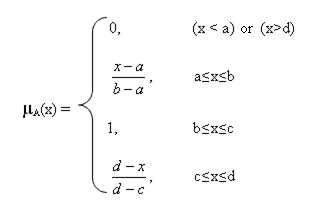

`trapmf(x, abcd)`

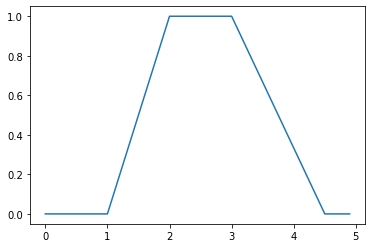

In [ ]:
x = np.arange(0, 5, 0.1)
mf_tp = fuzz.membership.trapmf(x, [1, 2, 3, 4.5])
plt.plot(x,mf_tp)

**Función gausiana:** definida por un valor central *m* y una desviación estándar *k*> 0. Cuanto menor es k, más estrecha es la "campana".

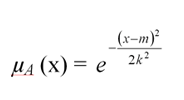

gaussmf(x, mean=m, sigma=k)

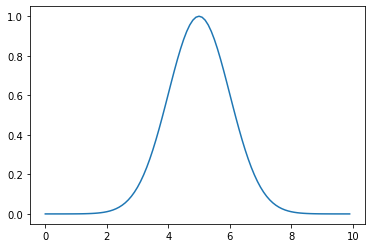

In [ ]:
x = np.arange(0, 10, 0.1)
mf_g = fuzz.membership.gaussmf(x, mean=5, sigma=1)
plt.plot(x,mf_g)

Efecto de cambiar sigma

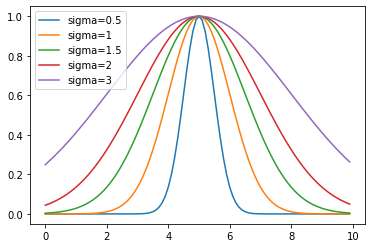

In [ ]:
x = np.arange(0, 10, 0.1)
plt.figure()
tests=[0.5,1,1.5,2,3]
for i,s in enumerate(tests):
  mf_gbell = fuzz.membership.gaussmf(x,mean=5, sigma=s)
  plt.plot(x,mf_gbell,label=f'sigma={s}')
plt.legend(loc='best')

**Función campana bell generalizada**:

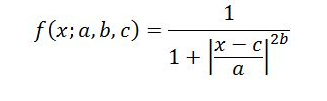

`gbellmf(x, a, b, c)`

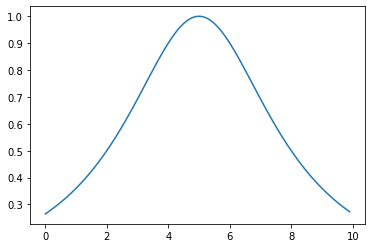

In [ ]:
x = np.arange(0, 10, 0.1)
mf_gbell = fuzz.membership.gbellmf(x,a=3,b=1,c=5)
plt.plot(x,mf_gbell)

Efecto de cambiar b

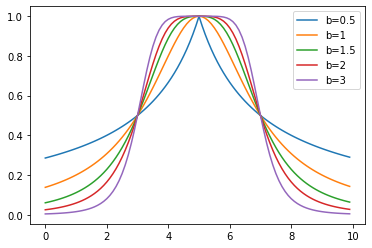

In [ ]:
x = np.arange(0, 10, 0.1)
plt.figure()
lb=[0.5,1,1.5,2,3]
for i,b in enumerate(lb):
  mf_gbell = fuzz.membership.gbellmf(x,a=2,b=b,c=5)
  plt.plot(x,mf_gbell,label=f'b={b}')
plt.legend(loc='best')

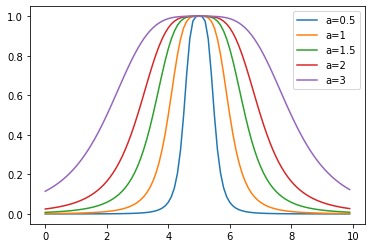

In [ ]:
x = np.arange(0, 10, 0.1)
plt.figure()
la=[0.5,1,1.5,2,3]
for i,a in enumerate(la):
  mf_gbell = fuzz.membership.gbellmf(x,a=a,b=2,c=5)
  plt.plot(x,mf_gbell,label=f'a={a}')
plt.legend(loc='best')

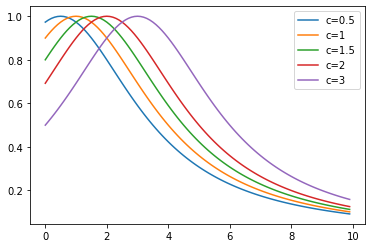

In [ ]:
x = np.arange(0, 10, 0.1)
plt.figure()
lc=[0.5,1,1.5,2,3]
for i,c in enumerate(lc):
  mf_gbell = fuzz.membership.gbellmf(x,a=3,b=1,c=c)
  plt.plot(x,mf_gbell,label=f'c={c}')
plt.legend(loc='best')

**Función sigmoid**: 

`skfuzzy.membership.sigmf(x, b, c)`

b: Desplazamiento o sesgo. Este es el valor central, donde es igual a 1/2.

c: Controla el "ancho" de la región sigmoidea alrededor de "b" (magnitud); también qué lado de la función está abierto (signo). Un valor positivo de significa que el lado izquierdo se acerca a 0.0 mientras que el lado derecho se acerca a 1 .; un valor negativo de "c" significa lo contrario.

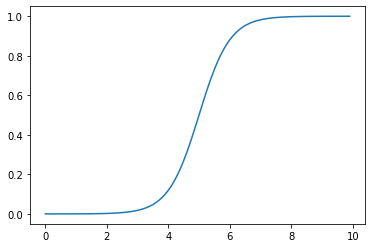

In [ ]:
x = np.arange(0, 10, 0.1)
mf_sig = fuzz.membership.sigmf(x,b=5,c=2)
plt.plot(x,mf_sig)

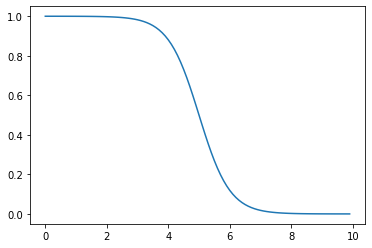

In [ ]:
x = np.arange(0, 10, 0.1)
mf_sig = fuzz.membership.sigmf(x,b=5,c=-2)
plt.plot(x,mf_sig)

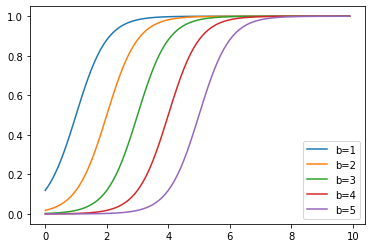

In [ ]:
x = np.arange(0, 10, 0.1)
for b in range(1,6):
  mf_sig = fuzz.membership.sigmf(x,b=b,c=2)
  plt.plot(x,mf_sig,label=f'b={b}')
plt.legend(loc='best')

## Operadores entre funciones de pertenencia

### Union/Fuzzy ‘OR’: Unión de dos conjuntos borrosos

`skfuzzy.fuzzy_or(x, mfx, y, mfy)`

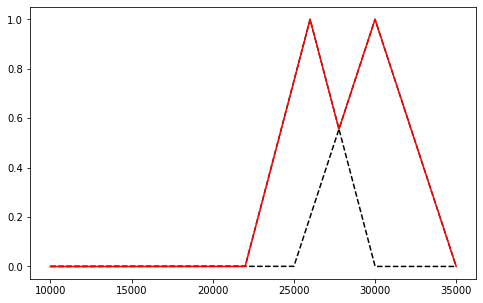

In [ ]:
x = np.arange(10000, 35000, 0.1)
tfo1= fuzz.trimf(x,[22000, 26000, 30000])
tfo2= fuzz.trimf(x,[25000, 30000, 35000])
y, union=fuzz.fuzzy_or(x, tfo1, x, tfo2)

plt.figure(figsize=(8, 5))
plt.plot(x,tfo1, 'k',linestyle='dashed')
plt.plot(x,tfo2, 'k',linestyle='dashed')
plt.plot(x, union, 'k', color='r')

### Intersection/Fuzzy ‘AND’: Intersección de dos conjuntos borrosos

`skfuzzy.fuzzy_and(x, mfx, y, mfy)`

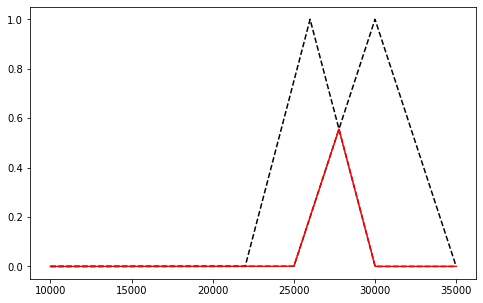

In [ ]:
y, intersection=fuzz.fuzzy_and(x, tfo1, x, tfo2)

plt.figure(figsize=(8, 5))
plt.plot(x,tfo1, 'k',linestyle='dashed')
plt.plot(x,tfo2, 'k',linestyle='dashed')
plt.plot(x, intersection, 'k', color='r')

###  Complement/Fuzzy ‘NOT’

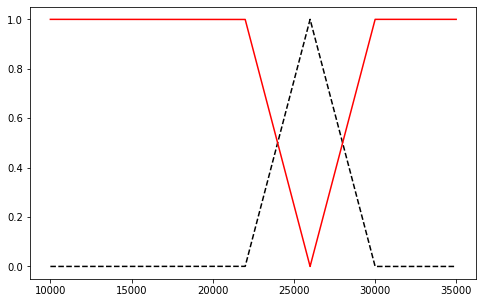

In [ ]:
complement=fuzz.fuzzy_not(tfo1)
plt.figure(figsize=(8, 5))
plt.plot(x,tfo1, 'k',linestyle='dashed')
plt.plot(x, complement, 'k', color='r')

###  Mínimo y producto de conjuntos

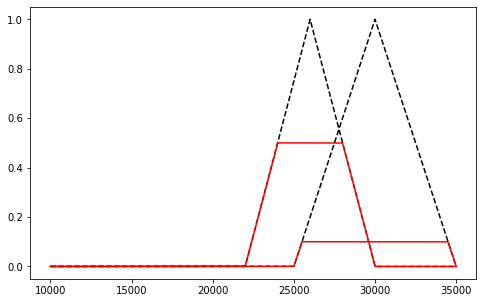

In [ ]:
x = np.arange(10000, 35000, 0.1)

tfo1= fuzz.trimf(x,[22000, 26000, 30000])
tfo2= fuzz.trimf(x,[25000, 30000, 35000])

plt.figure(figsize=(8, 5))

r1_min=fuzz.relation_min([0.5],tfo1)[0].T
r2_min=fuzz.relation_min([0.1],tfo2)[0].T
plt.plot(x,tfo1, 'k',linestyle='dashed')
plt.plot(x, r1_min, 'k', color='r')
plt.plot(x,tfo2, 'k',linestyle='dashed')
plt.plot(x, r2_min, 'k', color='r')

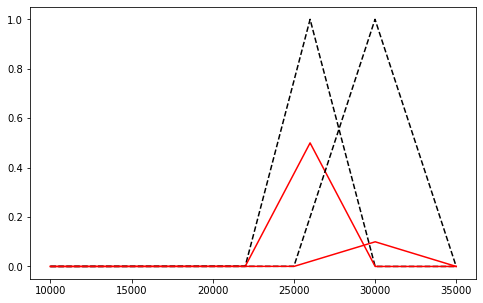

In [ ]:
x = np.arange(10000, 35000, 0.1)

tfo0= fuzz.trimf(x,[15000, 17500,	20000])
tfo1= fuzz.trimf(x,[22000, 26000, 30000])
tfo2= fuzz.trimf(x,[25000, 30000, 35000])

plt.figure(figsize=(8, 5))

r1_prod=fuzz.relation_product([0.5],tfo1)[0].T
r2_prod=fuzz.relation_product([0.1],tfo2)[0].T
plt.plot(x,tfo1, 'k',linestyle='dashed')
plt.plot(x, r1_prod, 'k', color='r')
plt.plot(x,tfo2, 'k',linestyle='dashed')
plt.plot(x, r2_prod, 'k', color='r')

## Defuzzificación

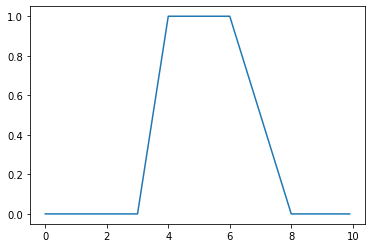

In [ ]:
x = np.arange(0, 10, 0.1)
mfx = fuzz.trapmf(x, [3, 4, 6, 8])
plt.plot(x,mfx)

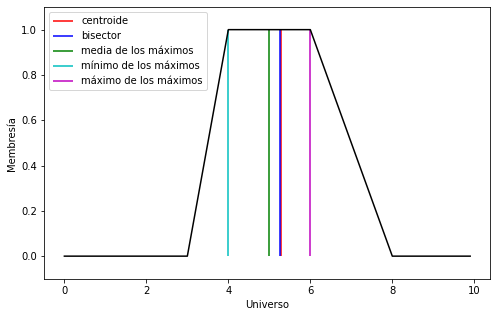

In [ ]:
# Diferentes formas de defuzificar
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

labels = ['centroide', 'bisector', 'media de los máximos', 
          'mínimo de los máximos', 'máximo de los máximos']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]


plt.figure(figsize=(8, 5))
plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
  plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Membresía')
plt.xlabel('Universo')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)
plt.show()

Si tomamos la unión del los mínimos realiza encima:

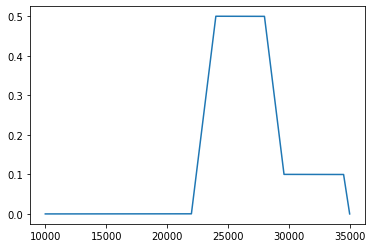

In [ ]:
x = np.arange(10000, 35000, 0.1)
y, union=fuzz.fuzzy_or(x, r1_min, x, r2_min)
plt.plot(x, union)

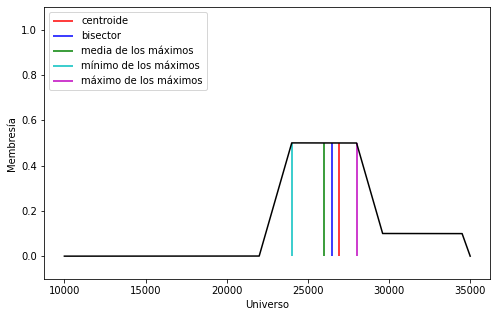

In [ ]:
defuzz_centroid = fuzz.defuzz(x, union, 'centroid')
defuzz_bisector = fuzz.defuzz(x, union, 'bisector')
defuzz_mom = fuzz.defuzz(x, union, 'mom')
defuzz_som = fuzz.defuzz(x, union, 'som')
defuzz_lom = fuzz.defuzz(x, union, 'lom')

labels = ['centroide', 'bisector', 'media de los máximos', 
          'mínimo de los máximos', 'máximo de los máximos']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, union, i) for i in xvals]

plt.figure(figsize=(8, 5))
plt.plot(x, union, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
  plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Membresía')
plt.xlabel('Universo')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)
plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=union,
    mode="lines",
    name="Membresía"
))
for v,l in zip(xvals,labels):
  fig.add_trace(go.Scatter(x=[v]*100, y=np.linspace(0,1,100),mode="lines", name=l))
fig.show()